In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [4]:
model= cv2.dnn_DetectionModel(frozen_model, config_file)

In [5]:
classLabels= []
file_name='Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels= fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'calculator']


In [7]:
print(len(classLabels))

81


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) #255/2=127.5
model.setInputMean((127.5,127.5,127.5)) #mobilenet => [-1,1]
model.setInputSwapRB(True) #auto convert BGR to RGB

< cv2.dnn.Model 000002BB58B904D0>

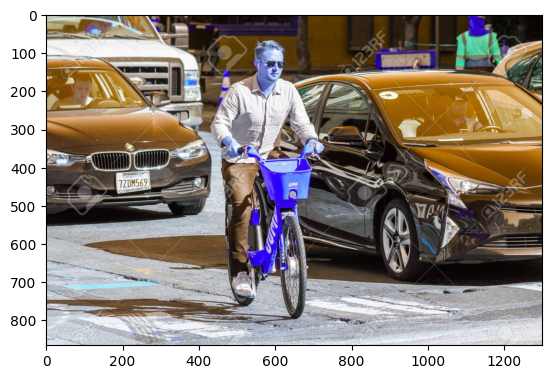

In [9]:
# Read an Image
img= cv2.imread('image3.jpg') #by default image is BGR
plt.imshow(img) 

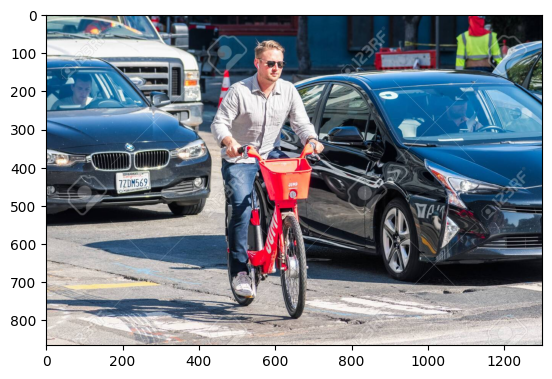

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #converting image to RGB

In [11]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5) #0.5= 50%

In [12]:
print(ClassIndex) #offset of 1

[1 3 3 3 2 1 3 8]


In [13]:
font_scale= 3
font= cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox): #all 3 variable in zip
    cv2.rectangle(img, boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(0,255,0), thickness=3)
    #reduce classIndex offset by 1 as person starts from 0 index

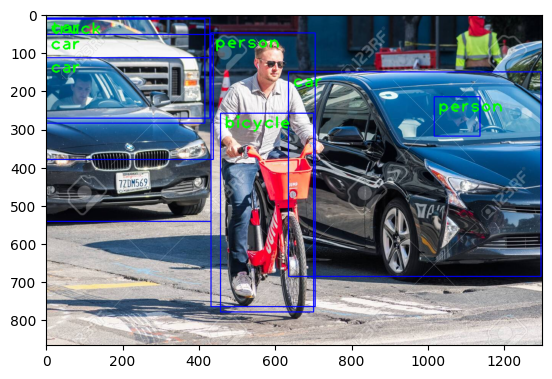

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #converting image to RGB

# for Video Detection 

In [15]:
capt= cv2.VideoCapture("Lambo.mp4") #for recorded video detection

#check if video opened correctly or not
if not capt.isOpened():
    capt= cv2.VideoCapture(0)
if not capt.isOpened():
    raise IOError("Cannot open Video") #replace with webcam for webcam detection

font_scale= 3
font= cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame= capt.read()
   
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55) #0.5= 50%

    print(ClassIndex)
    if(len(ClassIndex)!=0):
            for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox): #all 3 variable in zip
                if(ClassInd <=80):
                    cv2.rectangle(frame, boxes,(255,0,0),2) #red color rectangle adn text is green
                    cv2.putText(frame, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(0,255,0), thickness=3)
    
    cv2.imshow("Object Detection in Video", frame)

    if cv2.waitKey(2) & 0xff==ord('q'):
        break

capt.release()
cv2.destroyAllWindows()

[8 1 3 6 3 1 1 3 8 4 1]
[8 3 1 1 6 1 8 4 1 3 3]
[8 3 6 1 1 4 1 6 3 1]
[8 1 1 3 6 4 6 1 1]
[8 3 1 1 6 1 1 4 6 8 3 1]
[8 8 6 3 1 1 1 4 1 1 6 3 1]
[8 6 3 8 1 1 1 1 3 4 6]
[8 6 8 3 1 6 4 1 1 1 3 1]
[8 1 6 4 8 3 1 6 1 3 1 4 1]
[8 4 6 1 8 1 3 3 1 4 1 6]
[8 1 6 8 4 1 3 1 3 1 1 4]
[8 1 8 4 6 3 1 1 4 3 1]
[8 1 4 6 8 1 3 4 4 1 4 3]
[4 8 6 1 1 3 4 1 8 4 6 3]
[4 8 1 6 4 3 8 1 6 1 4 3 1]
[8 1 4 6 3 4 8 3 1 6 4 1]
[6 4 1 8 4 3 8 1 3 6 4 1 4]
[6 1 8 4 3 4 3 1 8 4 6]
[4 8 3 6 1 4 3 1 4 1]
[3 8 4 6 4 1 1 4 4 1 3 1 8 4]
[1 3 1 8 4 6 4 3]
[1 6 4 1 3 8 4 4 1]
[6 4 1 1 3 8 1 4 4 1]
[1 4 6 1 3 1 1 1 8 4 4 1]
[1 4 6 3 1 4 1 1 8 1 1]
[4 1 6 3 8 1 8 1 4 1 4 1 1 1]
[4 1 6 3 8 4 1 1 1 1 4 8 1 1 1 1]
[6 4 1 3 4 8 1 8 1 1 1 1 1 1]
[1 6 4 3 8 8 1 4 1 1 1 1 1 1 3]
[1 6 4 3 4 8 8 1 1 1 3]
[1 6 4 3 8 8 1 1 1 1 3 1 1]
[1 6 4 3 8 8 1 1 3 1]
[1 3 4 6 1 8 8 1 1 4]
[1 6 4 3 1 8 1 8 4 1 1 3]
[1 3 4 6 1 8 1 1 4 1 8 3 1]
[1 3 4 1 6 8 8 1 3 1 1]
[1 3 6 4 1 4 8 8 1 1 3 1 1]
[1 4 3 6 1 8 1 1 3 1 1 4]
[1 4 3 1 4 6 8 3 1 1 1]
[1 3

# Webcam Detection

In [ ]:
capt= cv2.VideoCapture(1)    #for webcam detection

#check if webcam opened correctly or not
if not capt.isOpened():
    capt= cv2.VideoCapture(0)
if not capt.isOpened():
    raise IOError("Cannot open Webcam") # for webcam detection

font_scale= 3
font= cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame= capt.read()
   
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55) #0.5= 50%

    print(ClassIndex)
    if(len(ClassIndex)!=0):
            for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox): #all 3 variable in zip
                if(ClassInd <=80):
                    cv2.rectangle(frame, boxes,(255,0,0),2) #red color rectangle adn text is green
                    cv2.putText(frame, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(0,255,0), thickness=3)
    
    cv2.imshow("Object Detection in Webcam", frame)

    if cv2.waitKey(2) & 0xff==ord('q'):
        break

capt.release()
cv2.destroyAllWindows()